## Sequential Logistic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
COLUMNS = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital','occupation', 
           'relationship', 'race', 'sex', 'capital_gain','capital_loss','hours_week','native_country',
           'label']

In [3]:
df = pd.read_csv(r"C:\Users\Acer\Desktop\AIMLP\Adult.csv", skipinitialspace=True, names = COLUMNS, index_col=False)
df

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df_test = pd.read_csv(r"C:\Users\Acer\Desktop\AIMLP\Adult_Test.csv",skiprows = 1, skipinitialspace=True, names = COLUMNS,
                      index_col=False)
df_test

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


In [5]:
import numpy as np
df.replace('?', np.nan, inplace = True)
df.dropna(inplace = True)

df_test.replace('?', np.nan, inplace = True)
df_test.dropna(inplace = True)

In [6]:
CATE_FEATURES = ['workclass', 'education', 'marital', 'occupation', 'relationship', 'race', 'sex']
for var in CATE_FEATURES:
    sex = pd.get_dummies(df[var], drop_first = True)
    df.drop([var], axis = 1, inplace = True)
    df = pd.concat([df,sex], axis = 1)
    
for var in CATE_FEATURES:
    sex = pd.get_dummies(df_test[var], drop_first = True)
    df_test.drop([var], axis = 1, inplace = True)
    df_test = pd.concat([df_test,sex], axis = 1)

In [7]:
# map the values '<=50k' with 0 and otherwise 1
label = {'<=50K': 0,'>50K': 1} # equivalent to ? : 
df.label = [label[item] for item in df.label]
label_t = {'<=50K.': 0,'>50K.': 1}
df_test.label = [label_t[item] for item in df_test.label] 

In [8]:
df.drop(['native_country'], axis = 1, inplace = True)

In [9]:
# X_train = df.drop(['label'], axis = 1, inplace = True)

In [10]:
df_test.drop(['native_country'], axis = 1, inplace = True)

In [11]:
Y_test = df_test['label']

In [12]:
def build_model():
    # Define the model - Sequential Model 
    # Activation function - ReLU, tf.nn.sigmoid
    # Multilayer neural network
    # First layer is input layer and the last one is output and all in b/w are hidden
    with tf.device("/device:GPU:1"):
        model = tf.keras.Sequential([
        layers.Dense(64, activation = tf.nn.sigmoid, input_shape = [len(df.keys())]),
        layers.Dense(64, activation = tf.nn.sigmoid),
        layers.Dense(64, activation = tf.nn.sigmoid),
        layers.Dense(1) ])
    # Model Optimizer - To optimize loss function
    # Adam(Value of alpha) learning rate
        # gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)
        # sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
        optimizer = tf.keras.optimizers.Adam(0.01)
        model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error', 
                         'mean_squared_error'])
    return model

In [13]:
model = build_model()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3712      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 12,097
Trainable params: 12,097
Non-trainable params: 0
_________________________________________________________________


In [15]:
example_batch = df[:10]
from sklearn.metrics import mean_squared_error
example_result = model.predict(example_batch)
example_result

array([[-0.534543  ],
       [-0.53454316],
       [-0.534543  ],
       [-0.534543  ],
       [-0.534543  ],
       [-0.534543  ],
       [-0.53454304],
       [-0.53454304],
       [-0.54899204],
       [-0.534543  ]], dtype=float32)

In [16]:
EPOCHS = 100
# model.fit(X = normed_train_data, Y = train_labels, epochs = number of iterations)
history = model.fit(df, df['label'], epochs=EPOCHS, validation_split = 0.2)

Train on 24129 samples, validate on 6033 samples
Epoch 1/100
24129/24129 [==============================] - 4s 156us/sample - loss: 0.1949 - mean_absolute_error: 0.3695 - mean_squared_error: 0.1949 - val_loss: 0.1865 - val_mean_absolute_error: 0.3810 - val_mean_squared_error: 0.1865
Epoch 2/100
24129/24129 [==============================] - 5s 222us/sample - loss: 0.1881 - mean_absolute_error: 0.3666 - mean_squared_error: 0.1881 - val_loss: 0.1864 - val_mean_absolute_error: 0.3636 - val_mean_squared_error: 0.1864
Epoch 3/100
24129/24129 [==============================] - 6s 233us/sample - loss: 0.1858 - mean_absolute_error: 0.3660 - mean_squared_error: 0.1858 - val_loss: 0.1872 - val_mean_absolute_error: 0.3560 - val_mean_squared_error: 0.1872
Epoch 4/100
24129/24129 [==============================] - 4s 154us/sample - loss: 0.1839 - mean_absolute_error: 0.3658 - mean_squared_error: 0.1839 - val_loss: 0.1865 - val_mean_absolute_error: 0.3624 - val_mean_squared_error: 0.1865
Epoch 5/100

24129/24129 [==============================] - 5s 226us/sample - loss: 0.1835 - mean_absolute_error: 0.3658 - mean_squared_error: 0.1835 - val_loss: 0.1863 - val_mean_absolute_error: 0.3793 - val_mean_squared_error: 0.1863
Epoch 36/100
24129/24129 [==============================] - 5s 211us/sample - loss: 0.1837 - mean_absolute_error: 0.3664 - mean_squared_error: 0.1837 - val_loss: 0.1864 - val_mean_absolute_error: 0.3640 - val_mean_squared_error: 0.1864
Epoch 37/100
24129/24129 [==============================] - 4s 168us/sample - loss: 0.1835 - mean_absolute_error: 0.3661 - mean_squared_error: 0.1835 - val_loss: 0.1862 - val_mean_absolute_error: 0.3674 - val_mean_squared_error: 0.1862
Epoch 38/100
24129/24129 [==============================] - 4s 149us/sample - loss: 0.1837 - mean_absolute_error: 0.3665 - mean_squared_error: 0.1837 - val_loss: 0.1861 - val_mean_absolute_error: 0.3738 - val_mean_squared_error: 0.1861
Epoch 39/100
24129/24129 [==============================] - 5s 215us/

Epoch 70/100
24129/24129 [==============================] - 2s 94us/sample - loss: 0.1836 - mean_absolute_error: 0.3659 - mean_squared_error: 0.1836 - val_loss: 0.1883 - val_mean_absolute_error: 0.3493 - val_mean_squared_error: 0.1883
Epoch 71/100
24129/24129 [==============================] - 2s 86us/sample - loss: 0.1836 - mean_absolute_error: 0.3668 - mean_squared_error: 0.1836 - val_loss: 0.1861 - val_mean_absolute_error: 0.3702 - val_mean_squared_error: 0.1861
Epoch 72/100
24129/24129 [==============================] - 2s 89us/sample - loss: 0.1834 - mean_absolute_error: 0.3660 - mean_squared_error: 0.1834 - val_loss: 0.1864 - val_mean_absolute_error: 0.3804 - val_mean_squared_error: 0.1864
Epoch 73/100
24129/24129 [==============================] - 2s 87us/sample - loss: 0.1835 - mean_absolute_error: 0.3664 - mean_squared_error: 0.1835 - val_loss: 0.1868 - val_mean_absolute_error: 0.3591 - val_mean_squared_error: 0.1868
Epoch 74/100
24129/24129 [==============================] - 

In [17]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
95,0.183674,0.365895,0.183674,0.186180,0.367890,0.186180,95
96,0.183565,0.366137,0.183565,0.186136,0.369349,0.186136,96
97,0.183529,0.366171,0.183529,0.186131,0.374867,0.186131,97
98,0.183640,0.366317,0.183640,0.186283,0.365596,0.186283,98
99,0.183517,0.366432,0.183517,0.186422,0.363392,0.186422,99


In [18]:
example_batch = df[:10]
from sklearn.metrics import mean_squared_error
example_result = model.predict(example_batch)
example_result

array([[0.23159735],
       [0.23159735],
       [0.23159735],
       [0.23159735],
       [0.23159735],
       [0.23159735],
       [0.23159735],
       [0.23159735],
       [0.98298484],
       [0.23159735]], dtype=float32)

In [19]:
df_test.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_week,label,Local-gov,Private,Self-emp-inc,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,Other,White,Male
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,28,336951,12,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,44,160323,10,7688,0,40,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
5,34,198693,6,0,0,30,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


In [20]:
example_batch = df_test
from sklearn.metrics import mean_squared_error
example_result = model.predict(example_batch)
example_result

array([[0.23159732],
       [0.23159732],
       [0.23159732],
       ...,
       [0.23159732],
       [0.23159732],
       [0.23159732]], dtype=float32)

In [21]:
predictions = np.round(example_result)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,predictions))

[[11360     0]
 [ 3609    91]]


In [22]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5]) 
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

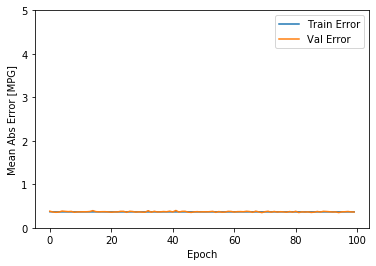

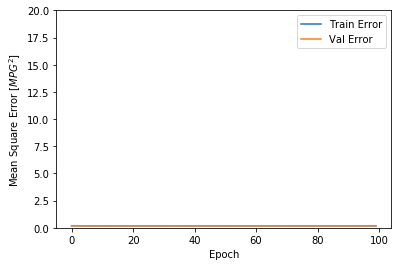

In [23]:
plot_history(history)